In [1]:
%load_ext autoreload
%autoreload 2
from nlp_utils import *
from data_utils import *
from KeywordExtractor import *

methods = {1: "degree_centrality", 2: "closeness_centrality", 3: "betweenness_centrality", 4:"eigenvector_centrality", 5:"pagerank"} #, \
           #6:"katz_centrality"} #, 7: "hits"}

In [3]:
# WORD EMBEDDINGS
import gensim.downloader as api

# Download a pre-trained Word2Vec model (you can choose other models as well)
model_name = "glove-wiki-gigaword-50"

# Download and load the model (this might take a while to download), uncomment when downloading the first time
# model = api.load(model_name)
# model.save('data/model.model')

Single abstract text example

Given abstract: 
The island country of Japan has developed into a great economy after World War 2. The Japan sea is a source of fish. Sushi is a famous fish and rice food.

Extracted tokens: 
['island', 'country', 'japan', 'great', 'economy', 'world_war_2', 'japan', 'sea', 'source', 'fish', 'sushi', 'famous', 'fish', 'rice', 'food']

Extracted sentences: 
[['island', 'country', 'japan', 'great', 'economy', 'world_war_2'], ['japan', 'sea', 'source', 'fish'], ['sushi', 'famous', 'fish', 'rice', 'food']]

Co-occurrences: 
{('country', 'island'): 1, ('island', 'japan'): 1, ('country', 'japan'): 2, ('country', 'great'): 1, ('great', 'japan'): 2, ('economy', 'japan'): 1, ('economy', 'great'): 2, ('great', 'world_war_2'): 1, ('economy', 'world_war_2'): 1, ('japan', 'sea'): 1, ('japan', 'source'): 1, ('sea', 'source'): 2, ('fish', 'sea'): 1, ('fish', 'source'): 1, ('famous', 'sushi'): 1, ('fish', 'sushi'): 1, ('famous', 'fish'): 2, ('famous', 'rice'): 1, ('fish', 'rice'): 2, ('fish', 'food'): 

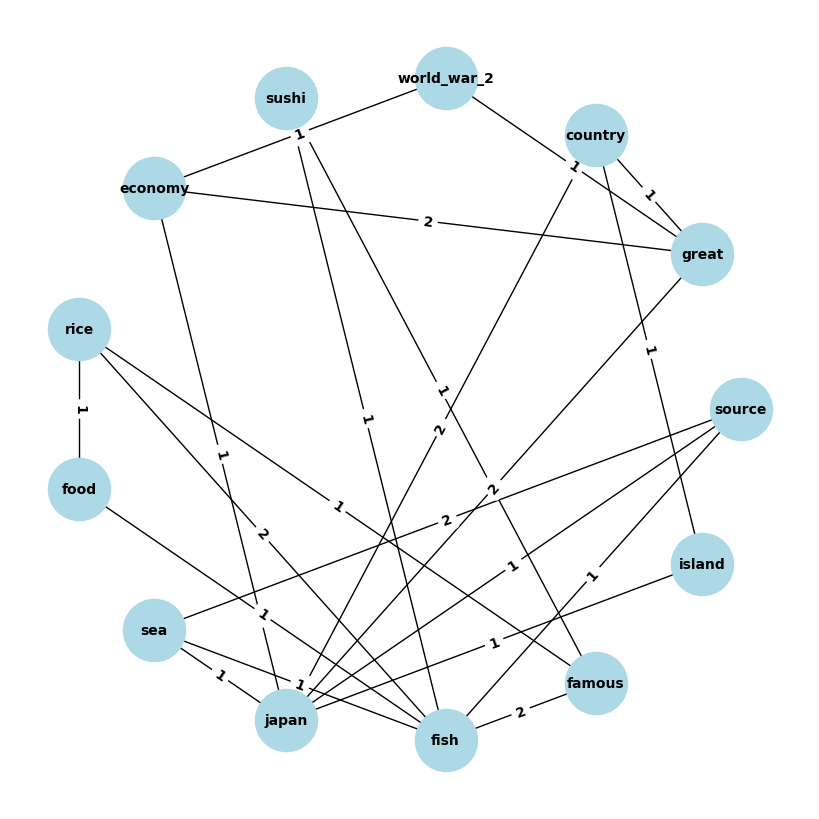

In [16]:
abstract = "The island country of Japan has developed into a great economy after World War 2. \
The Japan sea is a source of fish. Sushi is a famous fish and rice food."
ke = KeywordExtractor(abstract=abstract, window_size=3)
print(f"Given abstract: \n{abstract}\n")
print(f"Extracted tokens: \n{ke.tokens}\n")
print(f"Extracted sentences: \n{ke.sentences}\n")
print(f"Co-occurrences: \n{ke.co}\n")

keyword_dict = ke.order_nodes(method=methods[5], to_print=False) # done with method 5, pagerank
print(f"Keyword extraction scores: \n{keyword_dict}\n")
predicted_keywords = list(keyword_dict.keys())[:5]
print(f"The predicted keywords are: \n{predicted_keywords}")

ke.visualize_graph()

$5000$ paper abstracts scrape from IEEE example

Single Example

In [21]:
path_to_file = 'data/CS_unique.csv'

joined, abstracts, titles, keywords = get_data(path_to_file, version="CS")
N = 15 # example
ke = KeywordExtractor(abstract=joined[N], window_size=3)
print(f"Given abstract: \n{joined[N]}\n")
print(f"Extracted tokens: \n{ke.tokens}\n")
print(f"Extracted sentences: \n{ke.sentences}\n")
print(f"Co-occurrences: \n{ke.co}\n")

keyword_dict = ke.order_nodes(method=methods[5], to_print=False)
print(f"Keyword extraction scores: \n{keyword_dict}\n")
predicted_keywords = list(keyword_dict.keys())[:7]
print(f"The gold keyword are: \n{keywords[N]}\n")
print(f"The predicted keywords are: \n{predicted_keywords}")

Given abstract: 
ANFIS: adaptive-network-based fuzzy inference system. The architecture and learning procedure underlying ANFIS (adaptive-network-based fuzzy inference system) is presented, which is a fuzzy inference system implemented in the framework of adaptive networks. By using a hybrid learning procedure, the proposed ANFIS can construct an input-output mapping based on both human knowledge (in the form of fuzzy if-then rules) and stipulated input-output data pairs. In the simulation, the ANFIS architecture is employed to model nonlinear functions, identify nonlinear components on-line in a control system, and predict a chaotic time series, all yielding remarkable results. Comparisons with artificial neural networks and earlier work on fuzzy modeling are listed and discussed. Other extensions of the proposed ANFIS and promising applications to automatic control and signal processing are also suggested.< >

Extracted tokens: 
['fuzzy', 'inference', 'system', 'architecture', 'learn

For multiple examples

In [23]:
path_to_file = 'data/CS_unique.csv'

# creates a json object with the metrics, and a csv file for the metrics per abstract
metrics_dict = make_keyword_metrics(methods, path_to_file, window_size=3, number_of_papers=10)

Finished 1. abstract
